# Fitting Molecules not included in HITRAN

HITRAN's focus is on atmospherically relevent molecules.  This was the original focus of the MATS generation, however recent feature development has allowed for adaption of the isotope list to include non-HITRAN molecules.  

The example below shows how to supplement the HITRAN isotope list and then use that in simulations and fits.  The example is given for Mercury.

In [1]:
## Multi- Spectrum Fitting by Segment

import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

sys.path.append(r'C:\Users\ema3\Documents\MATS\MATS')# set location of HAPI.py module
from MATS import *

import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("poster")


HAPI version: 1.1.1.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


## Append to the HITRAN isotope list to include desired isotopes

The add_to_HITRANstyle_isotope_list allows you to ammend a given isotope list to include additional molecules and/or isotopes using the HITRAN molcule_id, local_isotope id, and global isotope id parameterization.  This function has some checks to verify expected behavior
* if the molecule id and isotope id are in the initial isotope line list, it will return 'Already entry with that molec_id and local_iso_id.  This result will write over that entry.
* if the molecule id is in the initial isotope list it will return 'This is being added as a new isotope of molecule name.  Proceed if that was the intention.
* if the global isotope id is already in the isotope list it will return, 'There is another entry with this global isotope id.  Consider changing the value for consistency'


In [2]:

HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = ISO, molec_id = 100, local_iso_id = 1, 
                                                    global_isotope_id = 200, iso_name = '196', 
                                                    abundance = 0.0015, mass = 195.96581, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 2, 
                                                    global_isotope_id = 201, iso_name = '198', 
                                                    abundance = 0.1004, mass =197.96674, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 3, 
                                                    global_isotope_id = 202, iso_name = '199A', 
                                                    abundance = 0.1694, mass =198.96825, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 4, 
                                                    global_isotope_id = 203, iso_name = '199B', 
                                                    abundance = 0.1694, mass =198.96825, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 5, 
                                                    global_isotope_id = 204, iso_name = '200', 
                                                    abundance = 0.2314, mass =199.96825, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 6, 
                                                    global_isotope_id = 205, iso_name = '201a', 
                                                    abundance = 0.1317, mass =200.97028, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 7, 
                                                    global_isotope_id = 206, iso_name = '201b', 
                                                    abundance = 0.1317, mass =200.97028, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 8, 
                                                    global_isotope_id = 207, iso_name = '201c', 
                                                    abundance = 0.1317, mass =200.97028, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 9, 
                                                    global_isotope_id = 208, iso_name = '202', 
                                                    abundance = 0.2974, mass =201.97062, mol_name = 'Hg')
HITRAN_Hg_isolist = add_to_HITRANstyle_isotope_list(input_isotope_list = HITRAN_Hg_isolist, molec_id = 100, local_iso_id = 10, 
                                                    global_isotope_id = 209, iso_name = '204', 
                                                    abundance = 0.0682, mass =203.97347, mol_name = 'Hg')

This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.
This is being added as a new isotope of Hg.  Proceed if that was the intention.


## Generate Spectra

The simulate spectrum function is used to generate spectra, but the isotope_list variable is set to use the isotope list that was just generated opposed to using the HITRAN isotope list. 

The initial parameter line list should have molecule and local isotope ids that correspond to the new isotope list.  The mole fraction definition should also use the appropriate mole fraction id.  The same would be true for the abundance_ratio_MI term if the sample was not at natural abundance.




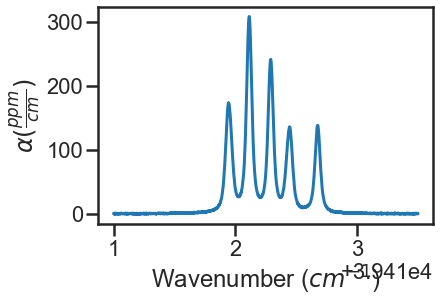

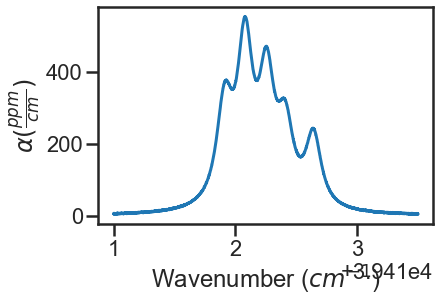

In [3]:
path = r'C:\Users\ema3\Documents\MATS\MATS\Examples\nonHITRAN_Molecules'
os.chdir(path)
PARAM_LINELIST = pd.read_csv('Hg_Linelist.csv')

#Generic Fit Parameters
wave_range = 1.5 #range outside of experimental x-range to simulate
IntensityThreshold = 1e-30 #intensities must be above this value to be simulated
Fit_Intensity = 1e-17 #intensities must be above this value for the line to be fit
order_baseline_fit = 0
tau_column = 'Absoprtion Coefficient (ppm/cm)' # Mean tau/us
freq_column = 'Frequency (cm-1)' # Total Frequency /MHz
pressure_column = 'Pressure (Torr)'
temperature_column = 'Temperature'

wave_min = 39411
wave_max = 39413.5
wave_step = 0.001
SNR = 1000


spec_1 = simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_step,
                        temperature = 25, pressure = 100, molefraction = { 100 :1e-9},
                        isotope_list = HITRAN_Hg_isolist, natural_abundance = True, SNR = 1000, filename = '100 Torr',)

spec_2 = simulate_spectrum(PARAM_LINELIST, wave_min, wave_max, wave_step,
                        temperature = 25, pressure = 500, molefraction = { 100 :1e-9},
                        isotope_list = HITRAN_Hg_isolist, natural_abundance = True, SNR = 1000,filename = '500 Torr',)

spec_1.plot_wave_alpha()
spec_2.plot_wave_alpha()




## Construct Dataset and Generate Fit Parameters

The construction of the dataset and the generate fit parameter classes act as normal.  For the generation of the fit parameter line list, the example below shows how the vary_variable input dictionaries function with multiple isotopes.  

In [4]:
#Add all spectrum to a Dataset object

SPECTRA = Dataset([spec_1, spec_2], 'Mercury Fitting',PARAM_LINELIST )

#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
BASE_LINELIST = SPECTRA.generate_baseline_paramlist()



  

FITPARAMS = Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST, lineprofile = 'VP', linemixing = False, 
                                  fit_intensity = Fit_Intensity, threshold_intensity = IntensityThreshold, sim_window = wave_range,
                                  nu_constrain = True, sw_constrain = True, gamma0_constrain = True, delta0_constrain = True, 
                                   aw_constrain = True, as_constrain = True, 
                                   nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True,
                                  additional_columns = ['trans_id'])

FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_sw ={100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}},
                                                    vary_gamma0 = {100:{1:True, 2:True, 3:True, 4: True, 5:True, 6:True, 7:True, 8:True, 9:True, 10: True}},
                                                    vary_delta0 = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_aw = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}},
                                                    vary_as = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_nuVC = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_eta = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}}, 
                                                    vary_linemixing = {100:{1:False, 2:False, 3:False, 4: False, 5:False, 6:False, 7:False, 8:False, 9:False, 10: False}})

FITPARAMS.generate_fit_baseline_linelist(vary_baseline = False, vary_molefraction = {100: False}, vary_xshift = False, 
                                      vary_etalon_amp= False, vary_etalon_period= False, vary_etalon_phase= False)







,Segment Number,Pressure,Pressure_err,Pressure_vary,Temperature,Temperature_err,Temperature_vary,baseline_a,baseline_a_err,baseline_a_vary,molefraction_Hg,molefraction_Hg_err,molefraction_Hg_vary,x_shift,x_shift_err,x_shift_vary
Spectrum Number,,,,,,,,,,,,,,,,
1.0,0.0,0.131579,0,False,298.15,0,False,0.0,0,False,1.000000e-09,0,False,0.0,0,False
2.0,0.0,0.657895,0,False,298.15,0,False,0.0,0,False,1.000000e-09,0,False,0.0,0,False


## Fit Spectra

The fit results shown below are the result of fitting spectra simulated with the SDVP with the VP and only allowing the collsional broadening terms to float.  The residuals at both pressures show the expected w-shaped residuals. 

We can compare the VP fit collisional broadening fit results to the SDVP collisional broadening values used in the simulation.  On the secondary y-axis is a stem plot showing the line intensity for the lines.  This highlights that the lines that deviated the most from the simulated collisional broadening value were weaker and/or closely spaced to other isotope transitions.

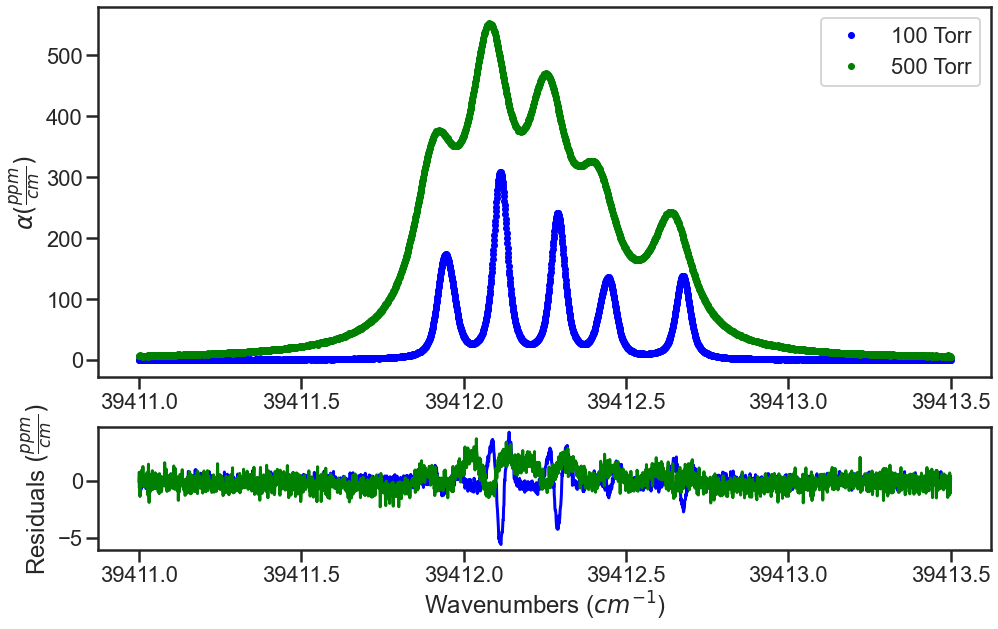

Text(0, 0.5, 'Relative Differnece between \n simulated SDVP $\\gamma_{0}$ and fit VP (%)')

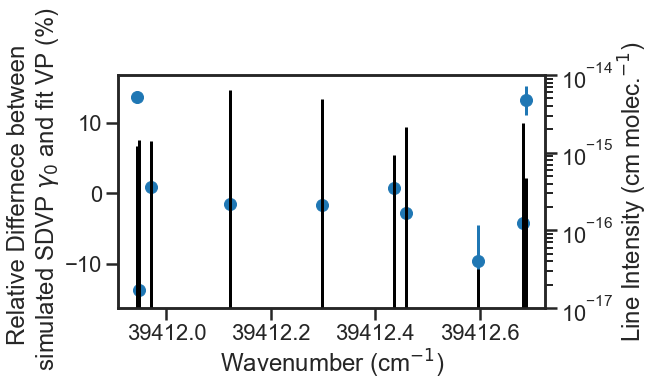

In [5]:
os.chdir(path)   
fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', minimum_parameter_fit_intensity = Fit_Intensity, weight_spectra = False)
params = fit_data.generate_params()


result = fit_data.fit_data(params, wing_cutoff = 25)

fit_data.residual_analysis(result, indv_resid_plot=False)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)
SPECTRA.plot_model_residuals()


Parameter_Linelist= pd.read_csv('Parameter_Linelist.csv', index_col = 0)
simulated_gamma0_air = PARAM_LINELIST['gamma0_air'].values[0]

fig, ax1 = plt.subplots(constrained_layout=True, figsize= [9, 4.5])
ax2 = ax1.twinx()
ax2.stem(Parameter_Linelist['nu'].values,Parameter_Linelist['sw'].values*Parameter_Linelist['sw_scale_factor'].values, "k", markerfmt = 'None', basefmt = 'None')
ax1.errorbar(Parameter_Linelist['nu'].values, 100*(Parameter_Linelist['gamma0_air'].values - simulated_gamma0_air)/ simulated_gamma0_air, 
             yerr = 100*(Parameter_Linelist['gamma0_air_err'].values)/ Parameter_Linelist['gamma0_air'].values,fmt = "o")


ax2.set_ylim(1e-17, 1e-14)
ax1.ticklabel_format(axis = 'x', useOffset = False)
ax2.set_yscale('log')
ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
ax2.set_ylabel('Line Intensity (cm molec.$^{-1}$)')
ax1.set_ylabel('Relative Differnece between \n simulated SDVP $\\gamma_{0}$ and fit VP (%)')
